# Aperiodic electrophysiological activity tracks spiking statistics between behavioral states
Sawyer Figueroa, Michael Preston, Bradley Voytek

# SfN 2023, Poster Panel 3
This notebook reproduces the figures from poster panel 3. Panel 3 compares spiking statistics between cognitive and behavioral states.

Dataset: Allen Institute for Brain Science: Visual Coding - Neuropixels  
© 2015 Allen Institute for Brain Science. Allen Brain Atlas API. Available from: https://portal.brain-map.org/explore/circuits/visual-coding-neuropixels

## Set-up

### set paths

In [17]:
# settings - directories
PROJECT_PATH = 'G:/Shared drives/visual_encoding'

### imports

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# general
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import neo

In [20]:
# custom
import sys
sys.path.append("../../")
from allen_vc.plots import sync_plot
from allen_vc.stats import sync_stats

print("Packages Imported")

Packages Imported


### Settings

In [21]:
# matplotlib and figure appearance settings
plt.style.use(f'../../stylelib/sfn_2023.mplstyle')
# COLORS = ["#7570b3", "#3FAA96", "#F39943"]


### load results

In [25]:
# load spike stats
df_running = pd.read_csv(f'{PROJECT_PATH}/data/spike_stats/region_metrics/spontaneous_running.csv')
df_stationary = pd.read_csv(f'{PROJECT_PATH}/data/spike_stats/region_metrics/spontaneous_stationary.csv')

# join
metric_df = pd.concat([df_running, df_stationary], ignore_index=True)
metric_df

,session,brain_structure,epoch_idx,epoch_times,running,mean_firing_rate,coefficient_of_variation,spike_distance,spike_synchrony
0,766640955,VISp,0,"[4965.52, 4995.52]",True,0.037622,1.110658,0.163423,0.370231
1,766640955,LGd,0,"[4965.52, 4995.52]",True,0.082058,1.033110,0.212247,0.339766
2,766640955,VISp,1,"[5213.48, 5243.48]",True,0.037805,1.063694,0.163266,0.376675
3,766640955,LGd,1,"[5213.48, 5243.48]",True,0.084370,1.026426,0.220148,0.340000
4,767871931,VISp,0,"[4429.72, 4459.72]",True,0.036567,1.376762,0.125223,0.368852
...,...,...,...,...,...,...,...,...,...
1375,766640955,LGd,41,"[6086.98, 6116.98]",False,0.061825,1.035868,0.217796,0.335689
1376,766640955,VISp,42,"[6116.98, 6146.98]",False,0.028635,1.193461,0.158384,0.361091
1377,766640955,LGd,42,"[6116.98, 6146.98]",False,0.054554,1.044482,0.212102,0.333847
1378,766640955,VISp,43,"[6146.98, 6176.98]",False,0.030031,1.077319,0.165063,0.363876


In [ ]:
# remove NaNs from the data
# metric_df = metric_df.dropna(subset=['mean_firing_rate', 'spike_distance'])

## Main

### Spike-distance graphic

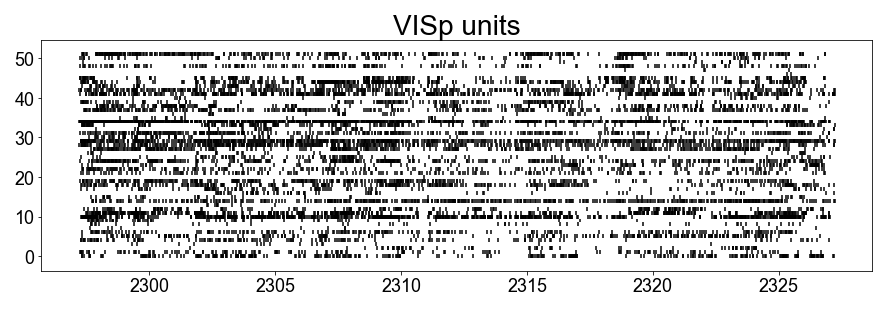

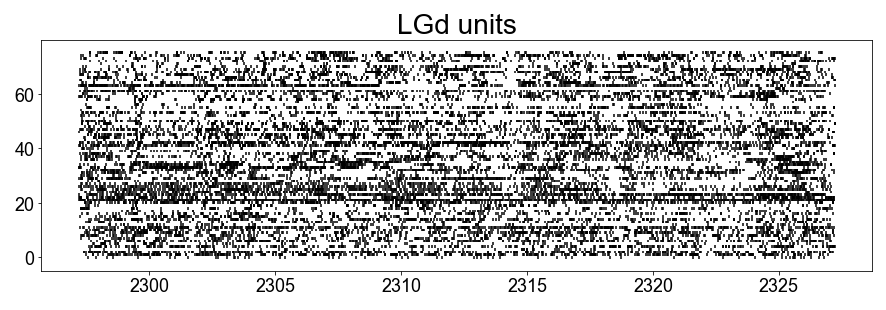

In [27]:
# load example data block
stim_code = 'natural_movie_one_more_repeats'
path_in = f"{PROJECT_PATH}/data/blocks/segmented/{stim_code}"
files = os.listdir(path_in)
fname_in = files[0] # first file
block = neo.io.NeoMatlabIO(f"{path_in}/{fname_in}").read_block()
segment = block.segments[0] # first segment

# get spike times for each region and plot
for region in ['VISp', 'LGd']:
    spike_trains = segment.filter(objects=neo.SpikeTrain, targdict={'brain_structure': region})
    spike_times = [st.times for st in spike_trains]

    # plot spikes
    fig_1, ax_1 = plt.subplots(figsize=(12, 4))
    ax_1.eventplot(spike_times, color='k')
    ax_1.set_title(f"{region} units")


### State comparison - violin plots
compare mean spike stats between states

In [28]:
def run_labels(s):
    if s == True:
        return 'running'
    else:
        return 'stationary'

metric_df['behavior'] = metric_df['running'].apply(run_labels)

In [32]:
# define metrics to be plotted 
metrics = ['mean_firing_rate', 'coefficient_of_variation', 'spike_distance', 'spike_synchrony']
condition = 'behavior'

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:1296: UserWarning: 14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:1296: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or u

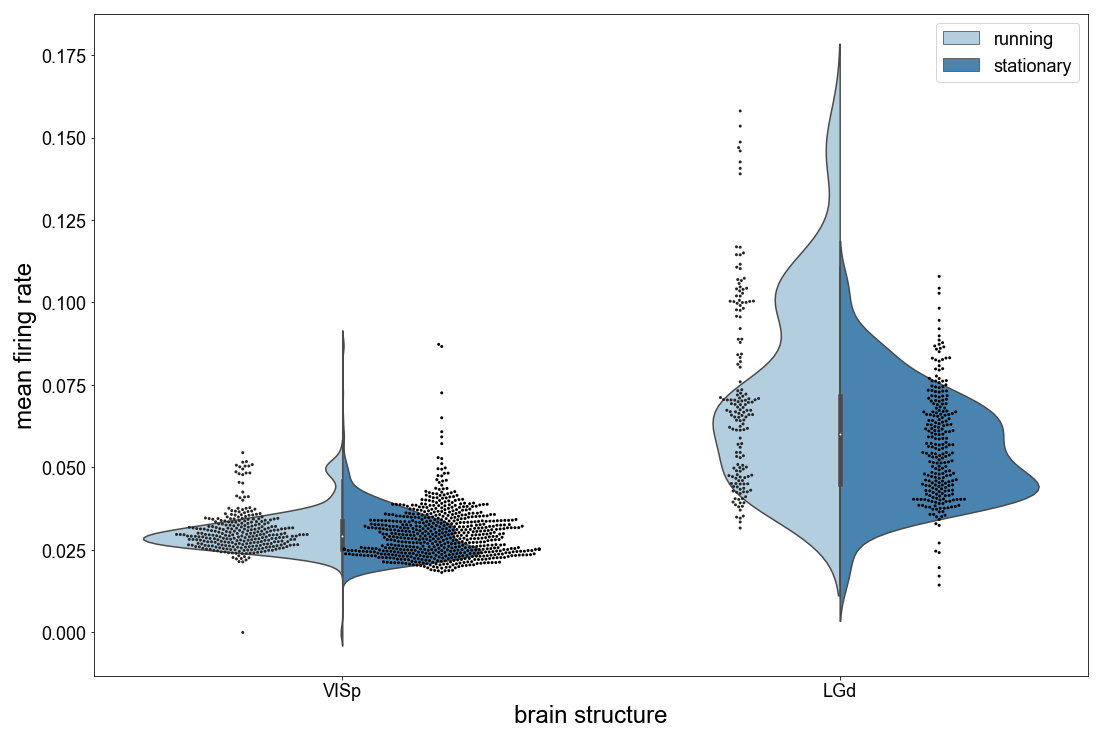

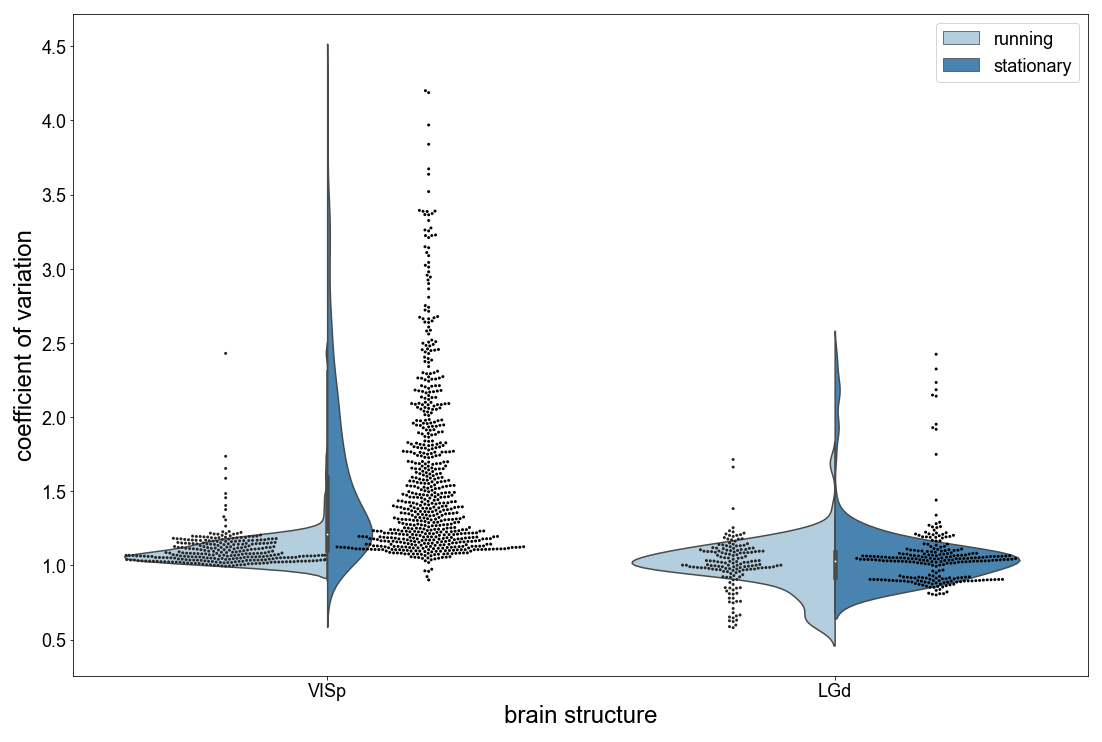

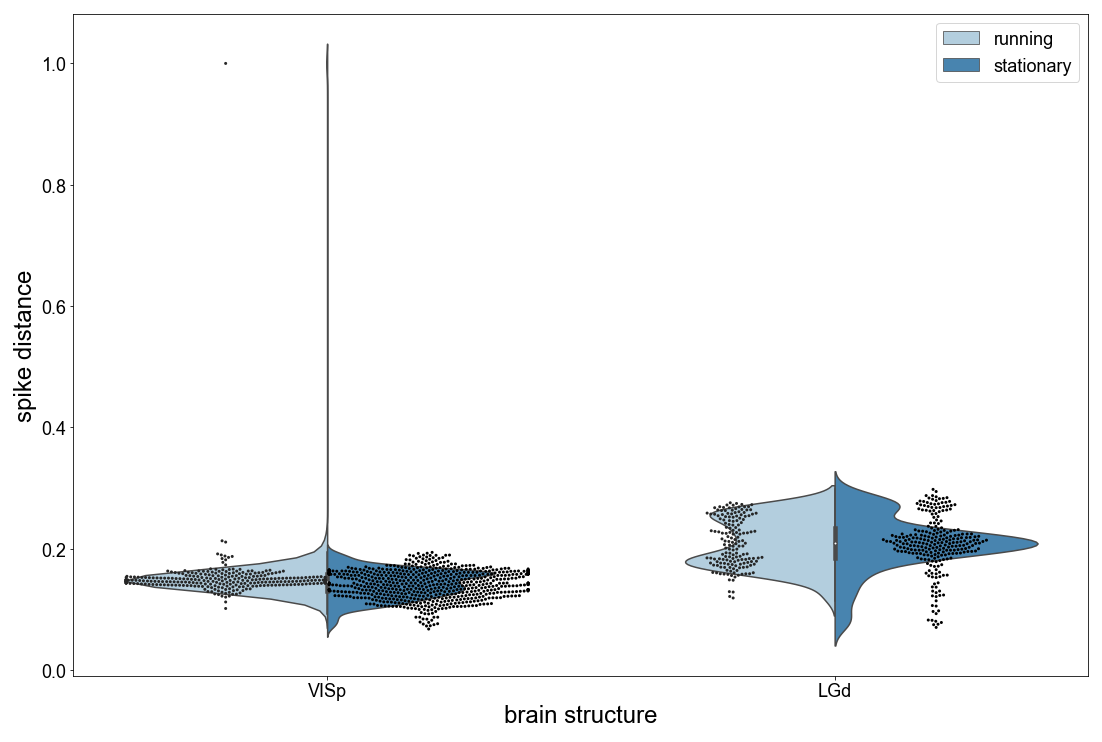

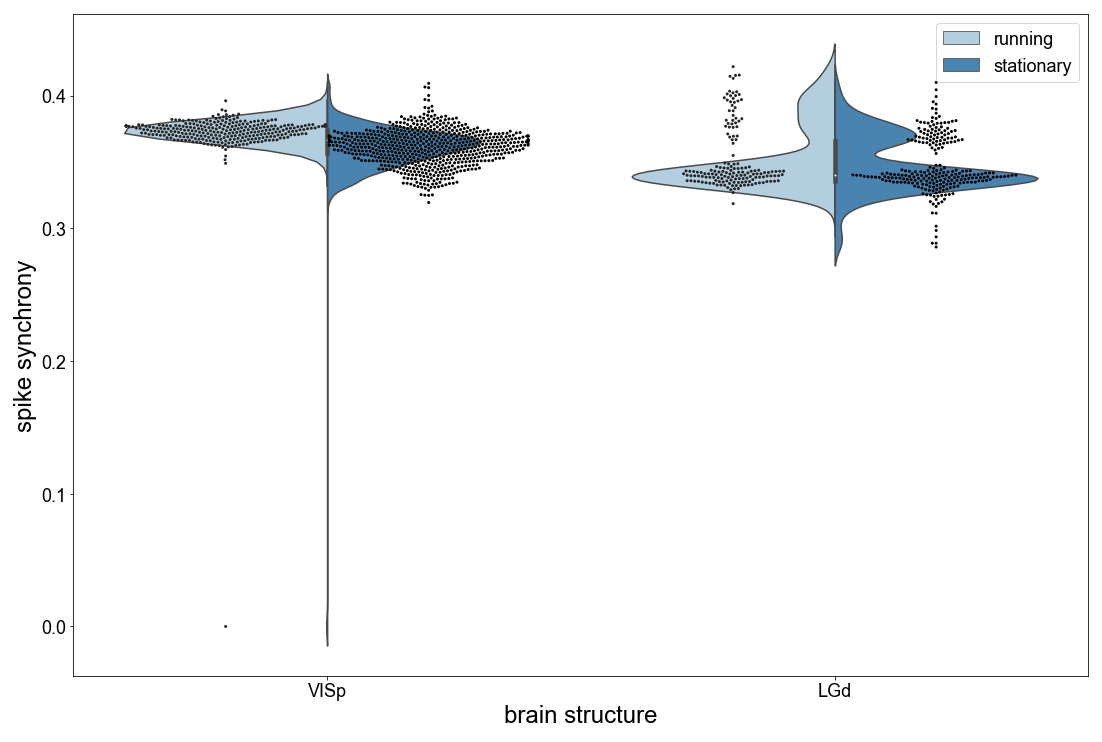

In [33]:
# plot all epocbhs
sync_plot(metric_df, metrics, condition, markersize=3);

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


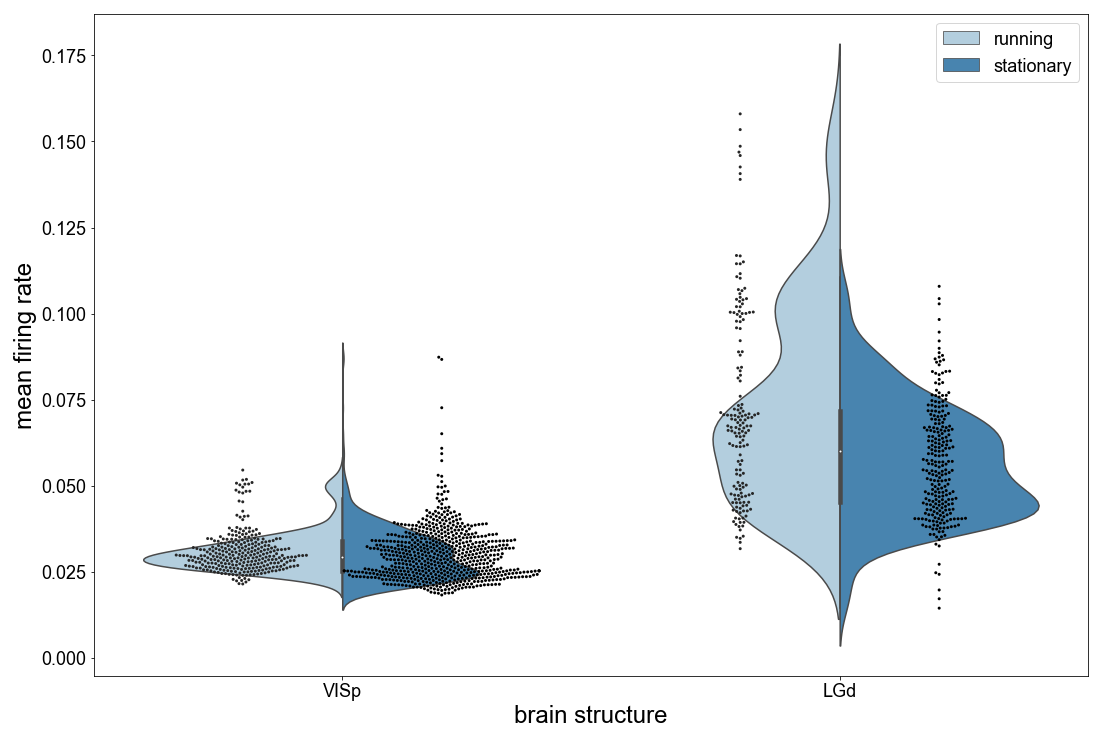

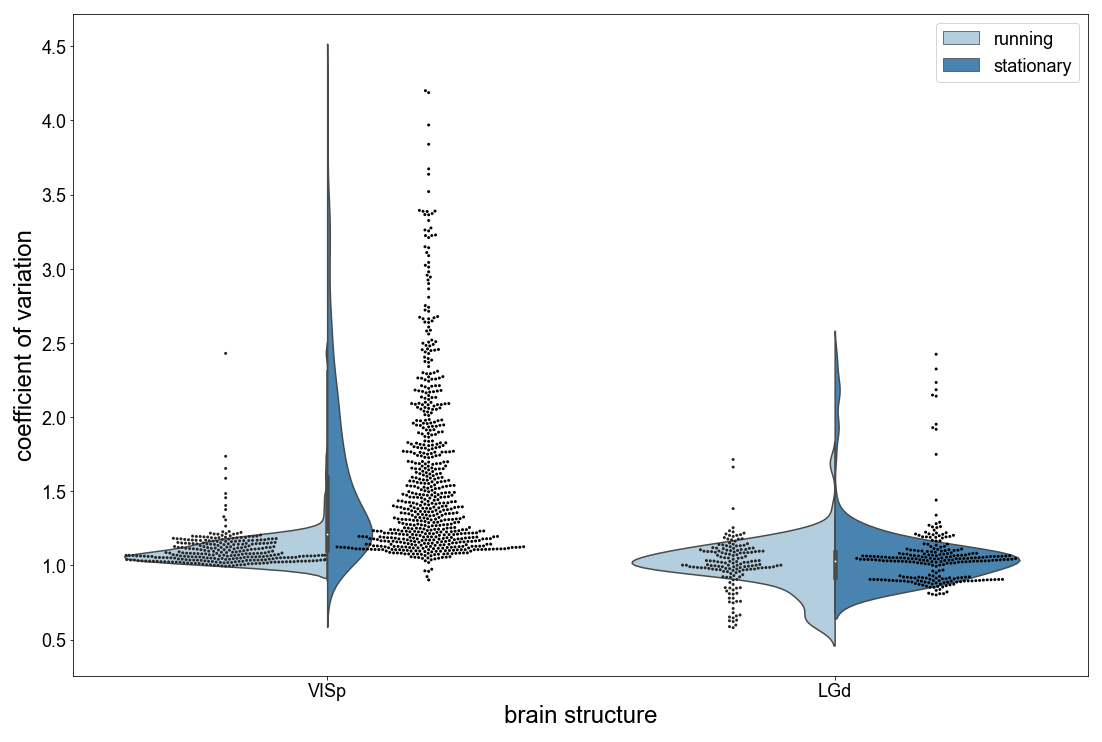

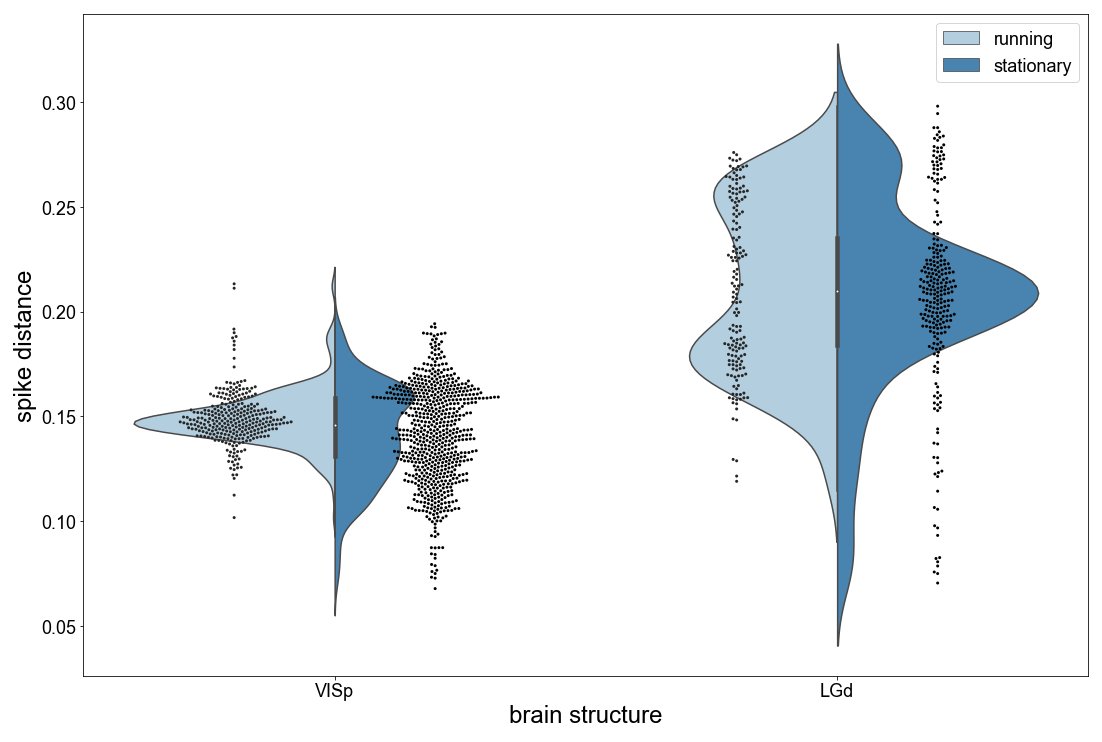

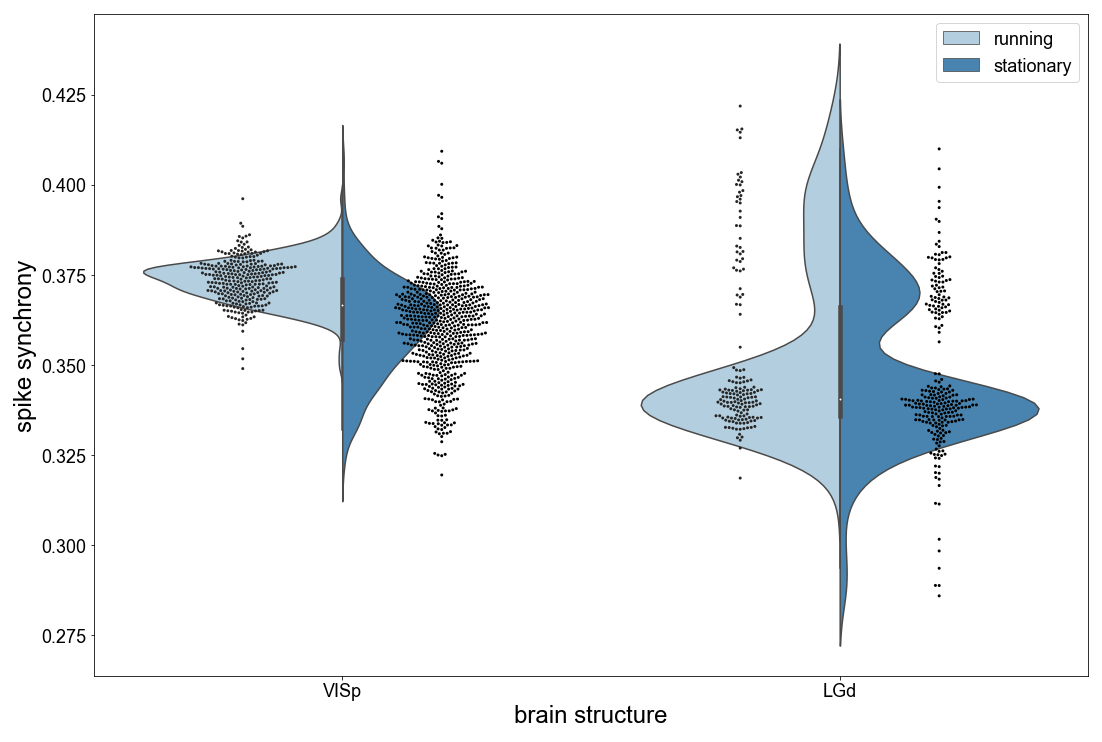

In [34]:
# plot all epochs - without outliers 

# identify clear outliers in SPIKE-distance
# metric_df[metric_df['spike_distance'] < 0.25]

# remove outliers
no_outliers_metric_df = metric_df[metric_df['spike_distance'] < 1]

# plot
sync_plot(no_outliers_metric_df, metrics, condition, markersize=3);

#plt.savefig("C:/Users/User/Documents/Voytek Lab/posters/figures/all_sessions_metric_violin_plots.png")

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


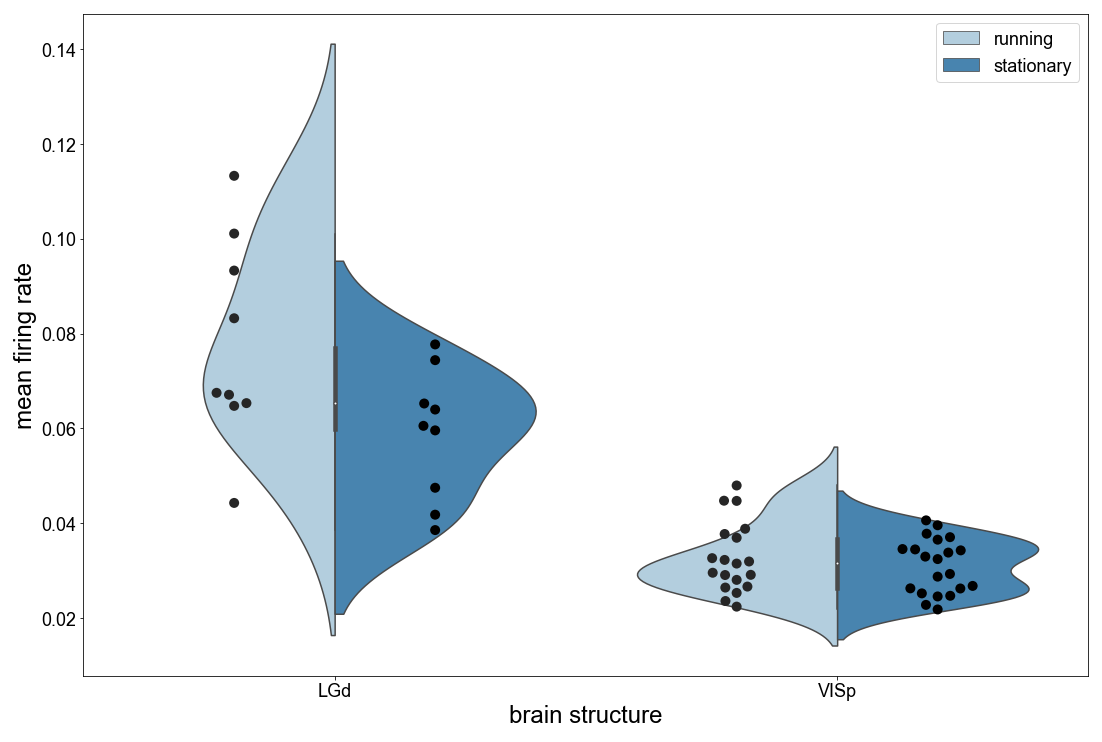

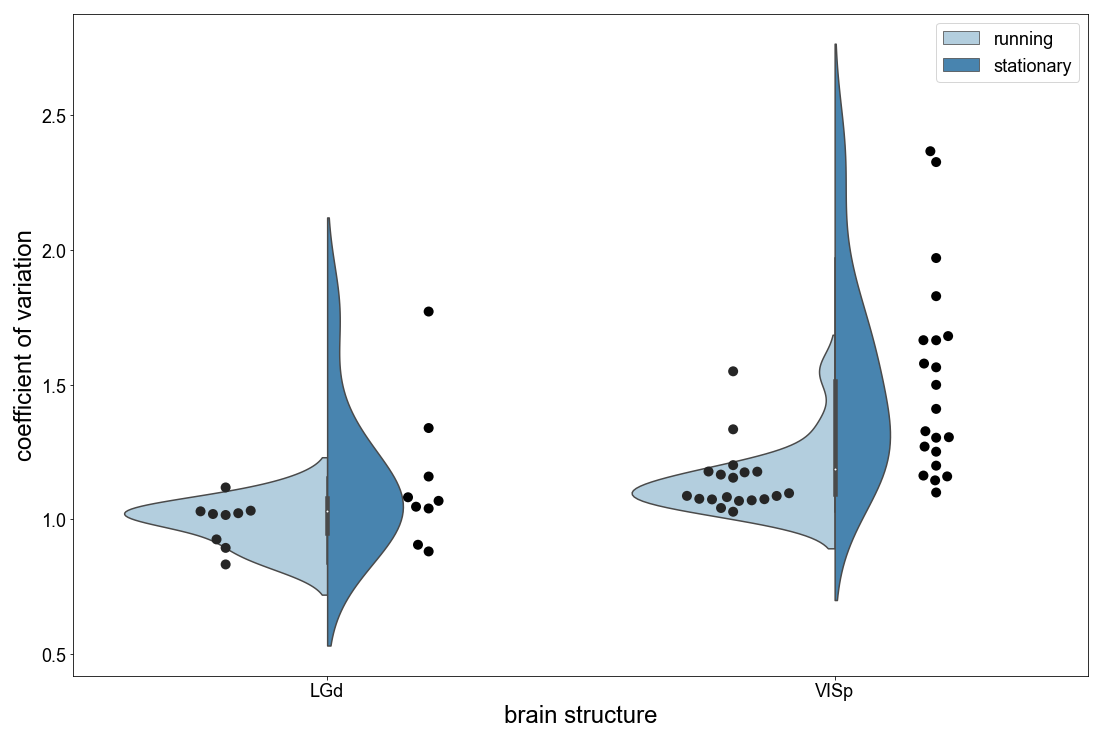

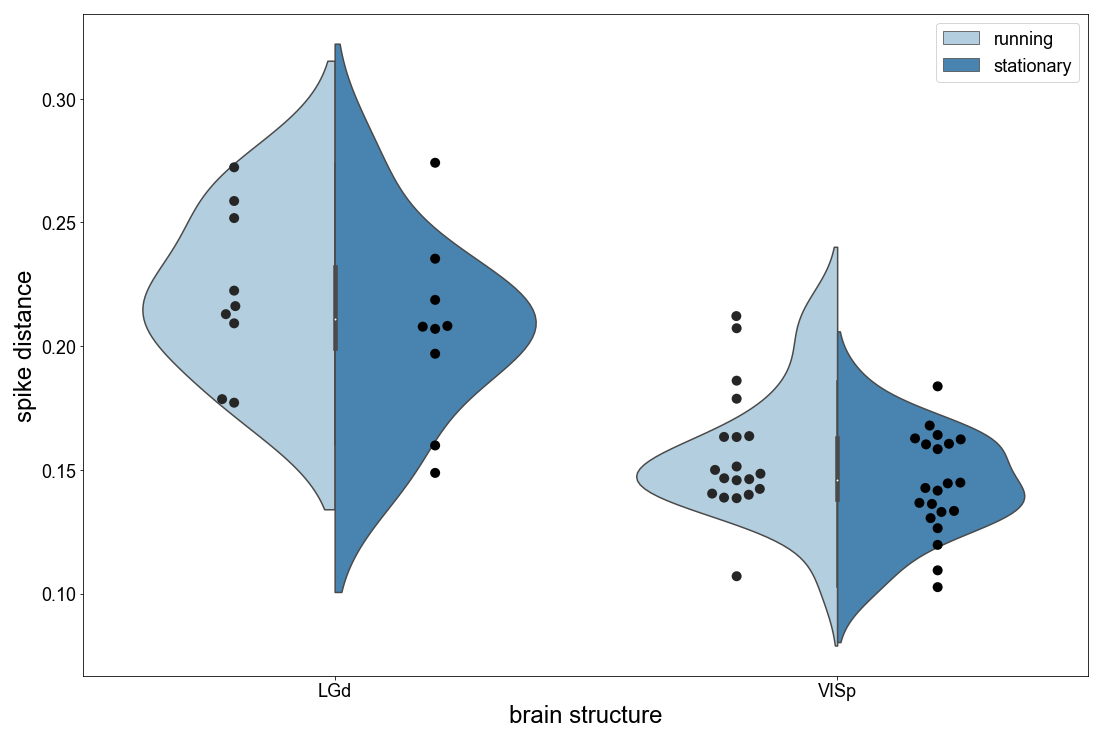

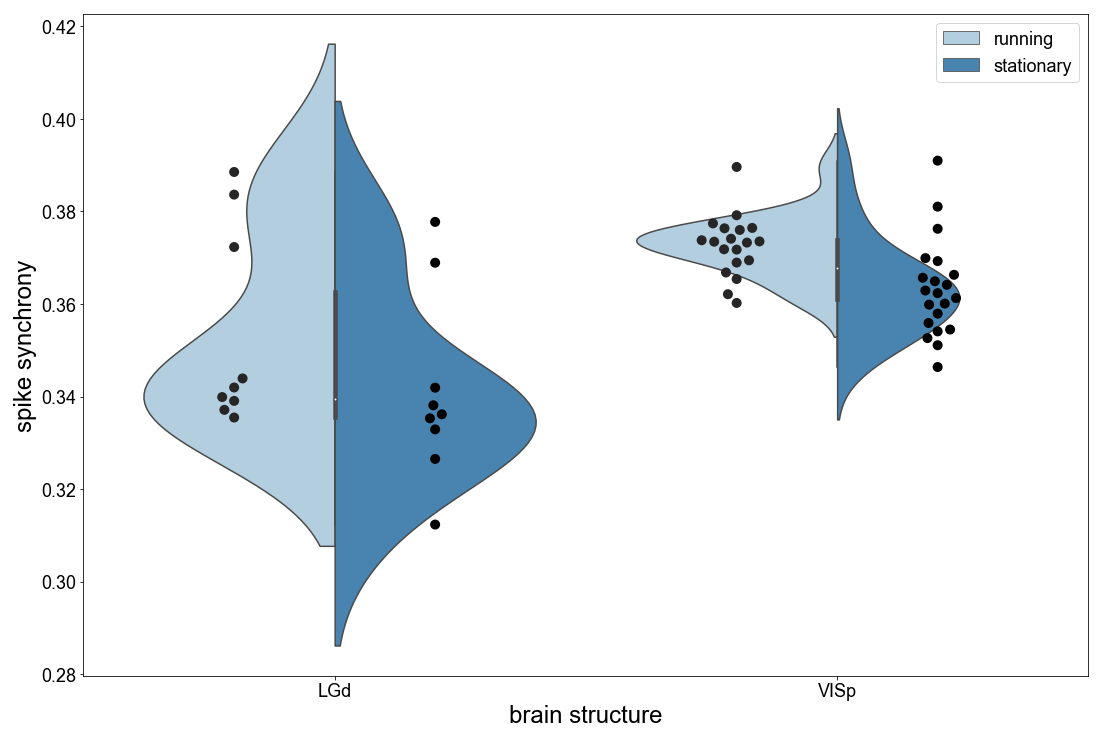

In [35]:
# plot subject average 

# average across trials
ses_avg = metric_df.groupby(['session', 'behavior', 'brain_structure']).mean().reset_index()

# plot
sync_plot(ses_avg, metrics, condition, markersize=10);

### State comparison - statistics

#### paired t-test

In [15]:
# post hoc tests

# look at diffs between running and stationary
print("ALL DATA\n\n\n")
sync_stats(metric_df, metrics, condition)

ALL DATA



REGION: VISp

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

METRIC: mean_firing_rate

Behavior: running
N = 299
Mean = 5.465580295498224
Stdev = 1.0403099076367723

Behavior: stationary
N = 664
Mean = 5.26230657490645
Stdev = 1.2942527706427738

Independent T-Test (All data)
Ttest_indResult(statistic=2.387782255703683, pvalue=0.017142729928100845)


----------------------------------------------------------------------------------------------------

METRIC: spike_distance

Behavior: running
N = 299
Mean = 0.15176473357254963
Stdev = 0.050712125580077795

Behavior: stationary
N = 664
Mean = 0.14136440288191174
Stdev = 0.02332860732494304

Independent T-Test (All data)
Ttest_indResult(statistic=4.354284135735598, pvalue=1.4782221542821623e-05)


----------------------------------------------------------------------------------------------------

REGION: LGd

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [16]:
print("GROUP AVERAGES\n\n\n")
sync_stats(ses_avg, metrics, condition, paired_ttest=True)

GROUP AVERAGES



REGION: LGd

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

METRIC: mean_firing_rate

Behavior: running
N = 9
Mean = 13.565424563038706
Stdev = 3.3131725941141275

Behavior: stationary
N = 9
Mean = 10.119672434648294
Stdev = 2.1876595072093843

Independent T-Test (All data)
Ttest_indResult(statistic=2.4547657022630522, pvalue=0.025924249373701313)

Paired T-Test
Ttest_relResult(statistic=3.949129112121454, pvalue=0.004241196973054426)


----------------------------------------------------------------------------------------------------

METRIC: spike_distance

Behavior: running
N = 9
Mean = 0.2221534179524424
Stdev = 0.03150251879059855

Behavior: stationary
N = 9
Mean = 0.2063264284351905
Stdev = 0.035200274597505556

Independent T-Test (All data)
Ttest_indResult(statistic=0.9476500163411974, pvalue=0.35740181725497144)

Paired T-Test
Ttest_relResult(statistic=1.3338701739542356, pvalue=0.21897012040046362)


---

#### hierarchical bootstrap